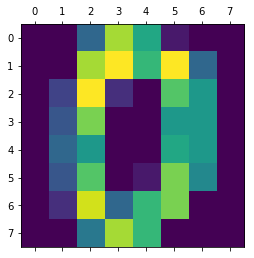

In [1]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf

#load data
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
digits= load_digits()

#Digit Visualization
plt.matshow(digits.images[0])
plt.show()

In [2]:
#making training and testing sets
from sklearn.model_selection import train_test_split
x_train , x_test, y_train , y_test = train_test_split(digits.data, digits.target, test_size=0.20, random_state=0)

# Part 1 : Regularization

In [3]:
#l2 penalty Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5)
skf.get_n_splits(x_train, y_train)
acc_list=[]
c_list=[]
alpha_lasso = [1e-10, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4,1e-3,1e-2,0.1,0.2,0.3
,0.4,0.5,0.6,0.7,0.8,0.9, 1, 10, 100 ]
for i in alpha_lasso:
    acc_sum=0
    for train_index, test_index in skf.split(x_train, y_train):
        x_tra, x_tes = x_train[train_index], x_train[test_index]
        y_tra, y_tes = y_train[train_index], y_train[test_index]
        mod1 = LogisticRegression(penalty='l2',C=i)
        mod1.fit(x_tra, y_tra) # fit
        y_pred = mod1.predict(x_tes) # predict
        acc_log = round(mod1.score(x_tes, y_tes) * 100, 2)
        acc_sum += acc_log
    acc_list.append(acc_sum/5.0)
    c_list.append(i)


In [4]:
#Dataframe for graph
df1 = pd.DataFrame({'c': np.round(np.log10(c_list),2), 'accuracy': acc_list})
df1

,accuracy,c
0,72.306,-10.00
1,72.376,-9.00
2,72.376,-8.00
3,73.142,-7.00
4,78.232,-6.00
5,87.004,-5.00
6,91.874,-4.00
7,94.650,-3.00
8,96.388,-2.00
9,96.868,-1.00


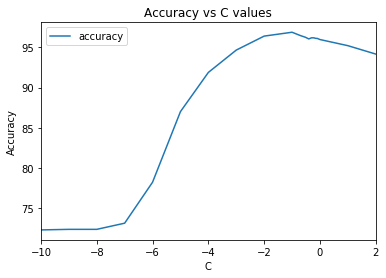

In [5]:
#Graph c values vs Accuracy
df1.plot('c','accuracy')
plt.title('Accuracy vs C values')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.show()

In [6]:
#l1 penalty Logistic Regression
skf2 = StratifiedKFold(n_splits=5)
skf2.get_n_splits(x_train, y_train)
acc_list2=[]
c_list2=[]
alpha_lasso = [1e-10, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4,1e-3,1e-2,0.1,0.2,0.3
,0.4,0.5,0.6,0.7,0.8,0.9, 1, 10, 100 ]
for i in alpha_lasso:
    acc_sum2=0
    for train_index, test_index in skf.split(x_train, y_train):
        x_tra, x_tes = x_train[train_index], x_train[test_index]
        y_tra, y_tes = y_train[train_index], y_train[test_index]
        mod2 = LogisticRegression(penalty='l1',C=i)
        mod2.fit(x_tra, y_tra) # fit
        y_pred2 = mod2.predict(x_tes) # predict
        acc_log2 = round(mod2.score(x_tes, y_tes) * 100, 2)
        acc_sum2 += acc_log2
    acc_list2.append(acc_sum2/5.0)
    c_list2.append(i)


In [7]:
#Dataframe for graph
df2 = pd.DataFrame({'c': np.round(np.log10(c_list2),2), 'accuracy': (acc_list2)})
df2

,accuracy,c
0,10.508,-10.00
1,10.508,-9.00
2,10.508,-8.00
3,10.508,-7.00
4,10.508,-6.00
5,10.508,-5.00
6,10.508,-4.00
7,74.602,-3.00
8,92.490,-2.00
9,96.524,-1.00


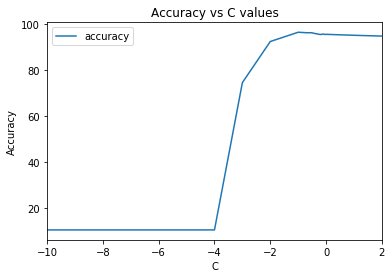

In [8]:
#Graph c values vs Accuracy
df2.plot('c','accuracy')
plt.title('Accuracy vs C values')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.show()

# Part 2 : Neural Networks

#Q1

In [9]:
#setting up tensorboard
tf.reset_default_graph()

from datetime import datetime
import os
import pathlib

t = datetime.utcnow().strftime("%Y%m%d%H%M%S") 
log_dir = "tf_logs"
logd = "/tmp/{}/r{}/".format(log_dir, t)

from pathlib import Path
home = str(Path.home())

logdir = os.path.join(os.sep,home,logd)

if not os.path.exists(logdir):
    os.makedirs(logdir)
    
# TensorBoard Graph visualizer
import numpy as np
from IPython.display import clear_output, Image, display, HTML

def strip_consts(graph_def, max_const_size=32):
    """Strip large constant values from graph_def."""
    strip_def = tf.GraphDef()
    for n0 in graph_def.node:
        n = strip_def.node.add() 
        n.MergeFrom(n0)
        if n.op == 'Const':
            tensor = n.attr['value'].tensor
            size = len(tensor.tensor_content)
            if size > max_const_size:
                tensor.tensor_content = "<stripped %d bytes>"%size
    return strip_def

def show_graph(graph_def, max_const_size=32):
    """Visualize TensorFlow graph."""
    if hasattr(graph_def, 'as_graph_def'):
        graph_def = graph_def.as_graph_def()
    strip_def = strip_consts(graph_def, max_const_size=max_const_size)
    code = """
        <script src="//cdnjs.cloudflare.com/ajax/libs/polymer/0.3.3/platform.js"></script>
        <script>
          function load() {{
            document.getElementById("{id}").pbtxt = {data};
          }}
        </script>
        <link rel="import" href="https://tensorboard.appspot.com/tf-graph-basic.build.html" onload=load()>
        <div style="height:600px">
          <tf-graph-basic id="{id}"></tf-graph-basic>
        </div>
    """.format(data=repr(str(strip_def)), id='graph'+str(np.random.rand()))

    iframe = """
        <iframe seamless style="width:1200px;height:620px;border:0" srcdoc="{}"></iframe>
    """.format(code.replace('"', '&quot;'))
    display(HTML(iframe))

Epoch: 0050 cost= 0.167865536
Train accuracy: 95.76 %   Val accuracy: 92.5 %  
Epoch: 0100 cost= 0.100271313
Train accuracy: 96.45 %   Val accuracy: 93.06 %  
Epoch: 0150 cost= 0.081500031
Train accuracy: 96.45 %   Val accuracy: 93.61 %  
Epoch: 0200 cost= 0.065337167
Train accuracy: 96.52 %   Val accuracy: 93.61 %  
Optimization Finished!


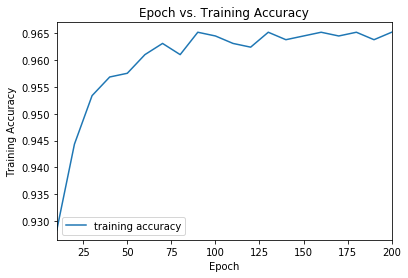

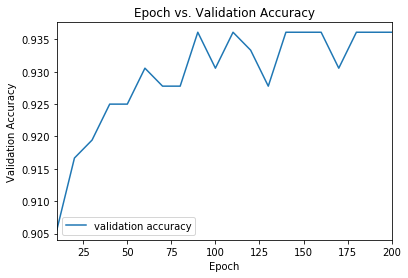

In [10]:
# Define input placeholder
x = tf.placeholder(tf.float32,shape = [None,64]) 


W = tf.Variable(tf.zeros([64, 10])) # number of weights
b = tf.Variable(tf.zeros([10])) # number of bias terms

#softmax regression
y_hat = tf.nn.softmax(tf.matmul(x, W) + b) 

#output placeholder
y = tf.placeholder(tf.float32, [None, 10])


# Cross entropy
ce = tf.reduce_mean(-tf.reduce_sum( y* tf.log(y_hat),axis=1))

#optimizing function to minimize loss with learning rate = 0.001
train_step = tf.train.GradientDescentOptimizer(0.001).minimize(ce)

#One Hot Encoder for training set
from sklearn.preprocessing import OneHotEncoder
data = y_train
onehot_encoder = OneHotEncoder(sparse=False)
data2 = data.reshape(len(data),1)
y_train_enc = onehot_encoder.fit_transform(data2)

#Repeating the same for test set
data = y_test
onehot_encoder = OneHotEncoder(sparse=False)
data2 = data.reshape(len(data),1)
y_test_enc = onehot_encoder.fit_transform(data2)


#defining function to make batches of training data    
def next_batch_fun(num, x, y):
    idx = np.arange(0 , len(data))
    np.random.shuffle(idx)
    idx = idx[:num]
    x_shuffle = [x[i] for i in idx]
    y_shuffle = [y[i] for i in idx]
    return np.asarray(x_shuffle), np.asarray(y_shuffle)

#list variables for graph later
ta = []
va = []
e = []
    
#training taking batch_size=100, epochs=200
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(200):
        avg_cost = 0.
        total_batch = int(digits.target.size/100)
        # Loop over all batches
        for i in range(total_batch):
            batch_xs, batch_ys = next_batch_fun(100,x_train,y_train_enc)
            # Fit training using batch data
            _, c = sess.run([train_step, ce], feed_dict={x: batch_xs, y: batch_ys})

            # Compute average loss
            avg_cost += c / total_batch
         # To compute logs per 10 epoch step for graph later
        if (epoch+1) % 10 == 0:
            #accuracy
            correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_hat,1))
            accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
            acc_train = accuracy.eval(feed_dict={x:x_train , y: y_train_enc})
            acc_val = accuracy.eval(feed_dict={x: x_test,y: y_test_enc})
            ta.append(acc_train)
            va.append(acc_val)
            e.append(epoch+1)
        #To display logs per 50 epochs
        if (epoch+1) % 50 == 0:
            print ("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(avg_cost) )
            print ("Train accuracy:", np.round((acc_train)*100,2),"%  ","Val accuracy:", np.round((acc_val)*100,2),"%  ")
       
    print ("Optimization Finished!")
    

#Dataframes for graphs    
df_ta = pd.DataFrame({'epoch': e , 'training accuracy': ta})
df_va = pd.DataFrame({'epoch': e , 'validation accuracy': va})

#Plotting Epoch vs Training Accuracy
df_ta.plot('epoch','training accuracy')
plt.title('Epoch vs. Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Training Accuracy')
plt.show()

#Plotting Epoch vs Validation Accuracy
df_va.plot('epoch','validation accuracy')
plt.title('Epoch vs. Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.show()


In [11]:
#Tensorboard Graph
show_graph(tf.get_default_graph())

#Q2

50 Train accuracy: 100.0 %   Val accuracy: 96.11 %  
100 Train accuracy: 100.0 %   Val accuracy: 96.39 %  
150 Train accuracy: 100.0 %   Val accuracy: 96.94 %  
200 Train accuracy: 100.0 %   Val accuracy: 96.94 %  
250 Train accuracy: 100.0 %   Val accuracy: 96.94 %  
300 Train accuracy: 100.0 %   Val accuracy: 96.94 %  
350 Train accuracy: 100.0 %   Val accuracy: 96.94 %  
400 Train accuracy: 100.0 %   Val accuracy: 96.94 %  
450 Train accuracy: 100.0 %   Val accuracy: 96.94 %  
500 Train accuracy: 100.0 %   Val accuracy: 96.94 %  
550 Train accuracy: 100.0 %   Val accuracy: 96.94 %  
600 Train accuracy: 100.0 %   Val accuracy: 96.94 %  
650 Train accuracy: 100.0 %   Val accuracy: 96.94 %  
700 Train accuracy: 100.0 %   Val accuracy: 97.22 %  
750 Train accuracy: 100.0 %   Val accuracy: 97.22 %  
800 Train accuracy: 100.0 %   Val accuracy: 97.22 %  
850 Train accuracy: 100.0 %   Val accuracy: 97.22 %  
900 Train accuracy: 100.0 %   Val accuracy: 97.22 %  
950 Train accuracy: 100.0 %  

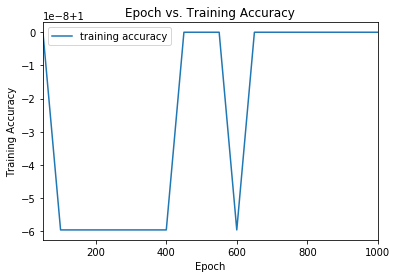

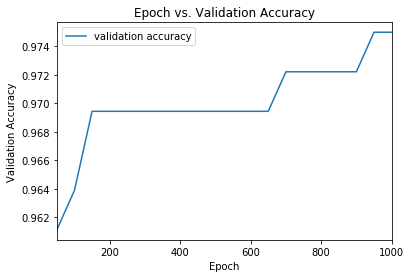

In [15]:
#Hyperparameters
n_hidden1 = 300
n_hidden2 = 200
n_hidden3 = 100
n_outputs = 10

#resetting the tensorboard graph
tf.reset_default_graph()

#Input and output placeholders
X = tf.placeholder(tf.float32, shape=[None, 64], name="X")
Y = tf.placeholder(tf.int64, shape=[None], name="Y")

#Defining function to write weights, biases and loss for each layer
def neuron_layer(X, n_neurons,  keep_prob, name, activation=None):
    # X input to neuron
    # number of neurons for the layer
    # name of layer
    # pass in eventual activation function
    
    with tf.name_scope(name):
        n_inputs = int(X.get_shape()[1])
        
        # initialize weights to prevent vanishing / exploding gradients
        stddev = 2 / np.sqrt(n_inputs)
        init = tf.truncated_normal((n_inputs, n_neurons), stddev=stddev)
        
        # Initialize weights for the layer
        W = tf.Variable(init, name="weights")
        # biases
        b = tf.Variable(tf.zeros([n_neurons]), name="bias")
        
        drop_out = tf.nn.dropout(X, keep_prob)
        
        # Output from every neuron
        Z = tf.matmul(X, W) + b
        if activation is not None:
            return activation(Z)
        else:
            return Z
        

#DNN for each layer along with tanh activation        
with tf.name_scope("dnn"):
    hidden1 = neuron_layer(X, n_hidden1,0.9, name="hidden1", activation=tf.nn.tanh)
    hidden2 = neuron_layer(hidden1, n_hidden2,0.9, name="hidden2", activation=tf.nn.tanh)
    hidden3 = neuron_layer(hidden2, n_hidden3,0.9, name="hidden3", activation=tf.nn.tanh)
    logits = neuron_layer(hidden3, 10,0.9, name="outputs")
    
    
#Softmax regression
with tf.name_scope("loss"):
    # logits are from the last output of the dnn
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=Y,logits=logits)
    ce = tf.reduce_mean(xentropy, name="loss")
    
learning_rate = 0.01

#Optimizer 
with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    train_step = optimizer.minimize(ce)
    
#Accuracy
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, Y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
    
#Making batches    
def next_batch_fun(num, x, y):
    idx = np.arange(0 , len(y))
    np.random.shuffle(idx)
    idx = idx[:num]
    x_shuffle = [x[i] for i in idx]
    y_shuffle = [y[i] for i in idx]
    return np.asarray(x_shuffle), np.asarray(y_shuffle)

#List for graphs
ta2 = []
va2 = []
e2 = []
    
init = tf.global_variables_initializer()
saver = tf.train.Saver()

#train
with tf.Session() as sess:
    init.run()
    for epoch in range(1000):
        for iteration in range(int(digits.target.size/100)):
            batch_xs, batch_ys = next_batch_fun(100,x_train,y_train)
            sess.run(train_step, feed_dict={X: batch_xs, Y: batch_ys})
        if (epoch+1)%50==0:
            acc_train = accuracy.eval(feed_dict={X: batch_xs, Y: batch_ys})
            acc_val = accuracy.eval(feed_dict={X: x_test,Y: y_test})
            ta2.append(acc_train)
            va2.append(acc_val)
            e2.append(epoch+1)
            print(epoch+1,"Train accuracy:",np.round((acc_train)*100,2),"%  ","Val accuracy:",np.round((acc_val)*100,2),"%  ")

    save_path = saver.save(sess, "./my_model_final.ckpt") # save model
    
    
#Dataframes for graphs    
df_ta2 = pd.DataFrame({'epoch': e2 , 'training accuracy': ta2})
df_va2 = pd.DataFrame({'epoch': e2 , 'validation accuracy': va2})

#Graphs for Epoch vs Training Accuracy
df_ta2.plot('epoch','training accuracy')
plt.title('Epoch vs. Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Training Accuracy')
plt.show()

#Graphs for Epoch vs Validation Accuracy
df_va2.plot('epoch','validation accuracy')
plt.title('Epoch vs. Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.show()


In [13]:
#Tensorboard Graph
show_graph(tf.get_default_graph())